<a href="https://colab.research.google.com/github/parkjh21c/ML-DL/blob/main/smarthon_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/smarthon/data.xlsx')

df['일자'] = pd.to_datetime(df['일자'])

# 데이터 순서 뒤집고 인덱스 다시 정의
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True)
df = df.set_index('일자')

df

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,...,선행 PER,BPS,PBR,주당배당금,배당수익률,외국인 보유수량,외국인 지분율,외국인 한도수량,외국인 한도소진율,등락
일자,,,,,,,,,,,,,,,,,,,,,
2023-01-02,76138,0,0.00,76552,78621,75000,691041,51302865100,3726370000000,50630000,...,12.75,57134,1.29,700,0.95,12069472,23.84,50630000,23.84,1
2023-01-03,73862,-2276,-2.99,76138,76966,72414,851220,60766095500,3614980000000,50630000,...,12.11,57134,1.25,700,0.98,11960663,23.62,50630000,23.62,0
2023-01-04,74276,414,0.56,74069,74586,71586,555372,39384977200,3635230000000,50630000,...,12.18,57134,1.26,700,0.97,11991757,23.69,50630000,23.69,1
2023-01-05,69103,-5173,-6.96,74379,74897,67862,1516452,103072000000,3382080000000,50630000,...,10.95,57134,1.17,700,1.05,12008255,23.72,50630000,23.72,0
2023-01-06,69310,207,0.30,68276,70552,68069,528494,35514686400,3392210000000,50630000,...,10.99,57134,1.17,700,1.04,11674802,23.06,50630000,23.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,326000,21000,6.89,306500,328500,306500,336668,107690000000,14859500000000,45581161,...,15.65,69773,4.67,1800,0.55,19749349,43.33,45581161,43.33,1
2024-12-24,324000,-2000,-0.61,329000,330000,320500,179574,58184245500,14768300000000,45581161,...,15.56,69773,4.64,1800,0.56,19822787,43.49,45581161,43.49,0
2024-12-26,323500,-500,-0.15,324000,327000,316500,186277,60108541000,14745500000000,45581161,...,15.53,69773,4.64,1800,0.56,19778192,43.39,45581161,43.39,0


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2023-01-02 to 2024-12-30
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   종가         489 non-null    int64  
 1   대비         489 non-null    int64  
 2   등락률        489 non-null    float64
 3   시가         489 non-null    int64  
 4   고가         489 non-null    int64  
 5   저가         489 non-null    int64  
 6   거래량        489 non-null    int64  
 7   거래대금       489 non-null    int64  
 8   시가총액       489 non-null    int64  
 9   상장주식수      489 non-null    int64  
 10  EPS        489 non-null    int64  
 11  PER        489 non-null    float64
 12  선행 EPS     489 non-null    int64  
 13  선행 PER     489 non-null    float64
 14  BPS        489 non-null    int64  
 15  PBR        489 non-null    float64
 16  주당배당금      489 non-null    int64  
 17  배당수익률      489 non-null    float64
 18  외국인 보유수량   489 non-null    int64  
 19  외국인 지분율    489 non-null    floa

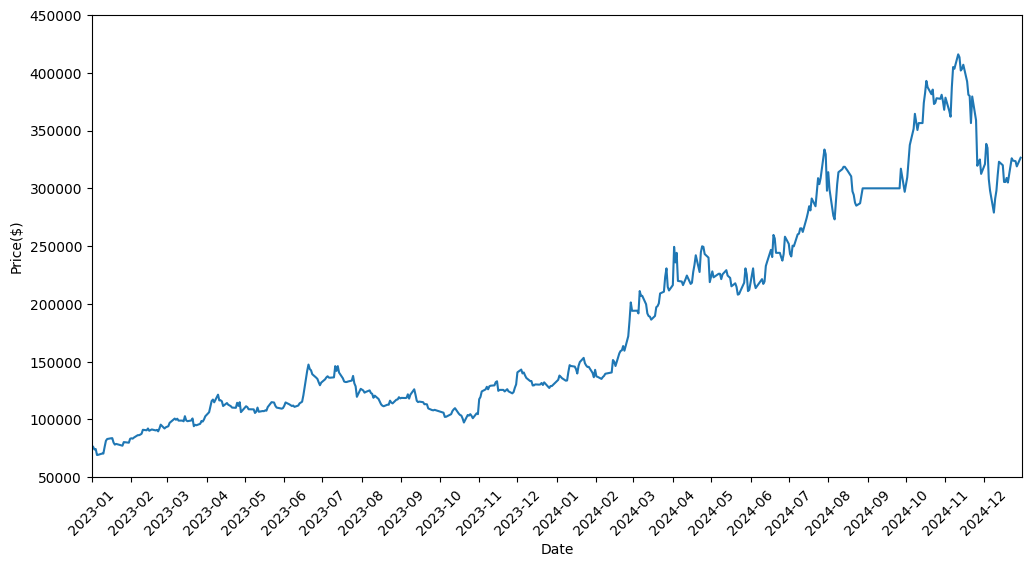

In [197]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12,6))
plt.plot(df.index, df['종가'])

plt.xlabel('Date')
plt.ylabel('Price($)')

# x축 범위 설정
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-12-31'))

# x축 눈금 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x축 레이블 회전
plt.xticks(rotation=45)

plt.yticks([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])

plt.show()

LSTM + 랜덤포레스트

In [198]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import to_categorical

target_column = df.columns[-1]

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 중요한 특징 선택
important_features = rf.feature_importances_

특징들 비교

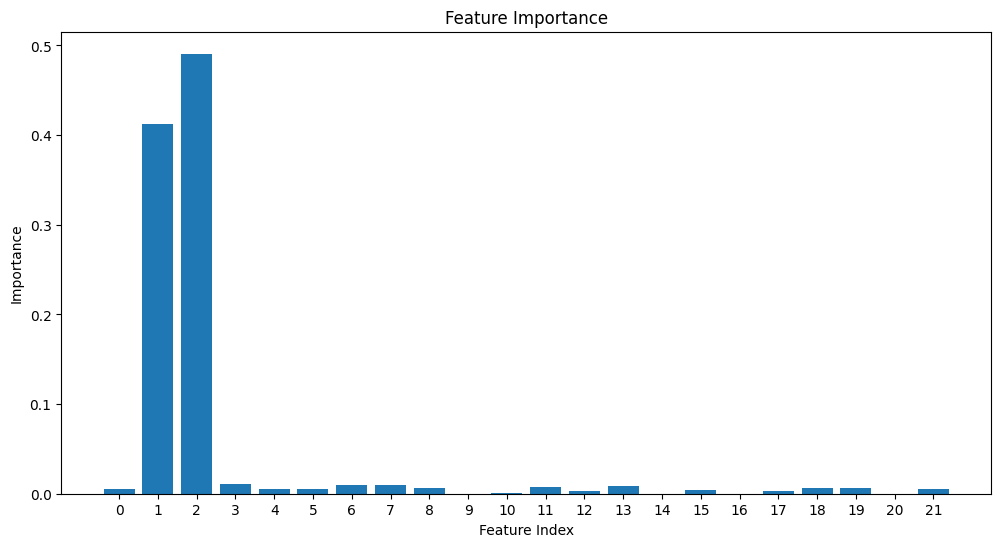

In [200]:
plt.figure(figsize=(12,6))
plt.bar(important_features.argsort(), important_features[important_features.argsort()])
plt.xticks(np.arange(len(important_features)))
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

대비 등락률 => 부호 때문에 높은 연관성


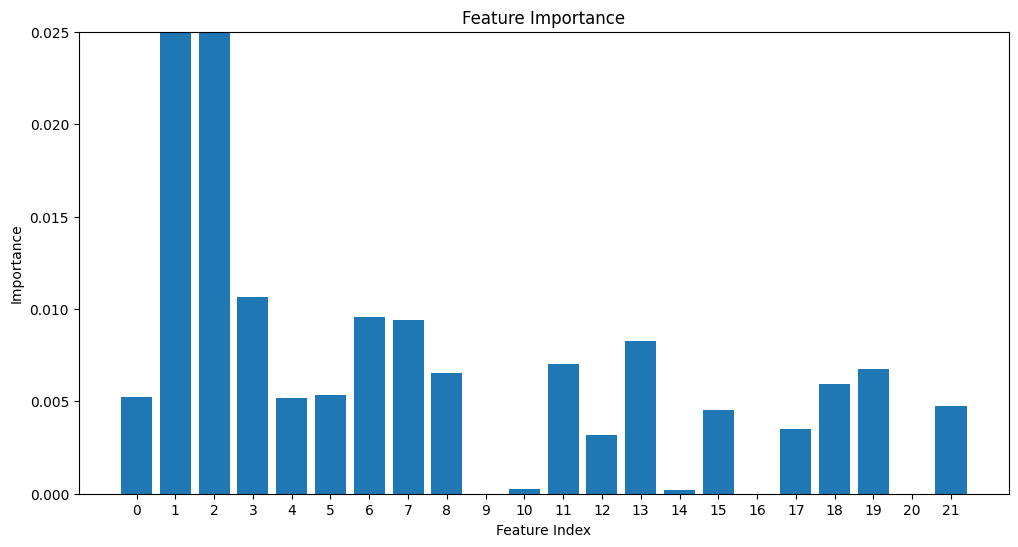

In [201]:
plt.figure(figsize=(12,6))
plt.bar(important_features.argsort(), important_features[important_features.argsort()])
plt.xticks(np.arange(len(important_features)))
plt.ylim([0,0.025])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [202]:
top_features_indices = important_features.argsort()[-16:][::-1]
X_selected = X_train.iloc[:,top_features_indices]
X_selected.columns



Index(['등락률', '대비', '시가', '거래량', '거래대금', '선행 PER', 'PER', '외국인 지분율', '시가총액',
       '외국인 보유수량', '저가', '종가', '고가', '외국인 한도소진율', 'PBR', '배당수익률'],
      dtype='object')

시가 총액, 상장 주식수, BPS, 주당배당금, 외국인 한도수량 은 거의 상관 없어나 아예 상관 없는걸로 보임

In [203]:
y_train.shape

(391,)

In [204]:
len(X_selected) == len(y_train)

True

In [205]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 시계열 데이터 생성
def create_sequences(data, labels, sequence_length=7):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(labels[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 7
X_seq, y_seq = create_sequences(X_selected, y_train, sequence_length)

# 데이터 분할
X_LSTM_train, X_LSTM_test, y_LSTM_train, y_LSTM_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# y_train을 원-핫 인코딩으로 변환
y_LSTM_train = to_categorical(y_LSTM_train, num_classes=2)  # 2개 클래스
y_LSTM_test = to_categorical(y_LSTM_test, num_classes=2)

# LSTM 모델 정의
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X_LSTM_train.shape[2])),
    Dense(2, activation='sigmoid')  #이진 분류
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# LSTM 학습
model.fit(X_LSTM_train, y_LSTM_train, epochs=10, batch_size=32, validation_data=(X_LSTM_test, y_LSTM_test))


Epoch 1/10


<ipython-input-205-bdf8e74c7845>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(labels[i + sequence_length])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5619 - loss: 623534145536.0000 - val_accuracy: 0.5065 - val_loss: 523167531008.0000
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5409 - loss: 432400859136.0000 - val_accuracy: 0.5065 - val_loss: 305362665472.0000
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5454 - loss: 237494075392.0000 - val_accuracy: 0.5065 - val_loss: 97647992832.0000
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5178 - loss: 58748411904.0000 - val_accuracy: 0.4935 - val_loss: 41768169472.0000
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4664 - loss: 49817059328.0000 - val_accuracy: 0.4935 - val_loss: 20023224320.0000
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5228 - loss: 25080877056.0000 - val_accuracy: 0.4545 - val_loss: 15369844736.0000
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4372 - loss: 24969068544.0000 - val_accuracy: 0.3896 - val_loss: 

In [206]:
# LSTM으로 특징 추출
lstm_features = model.predict(X_seq)

# 랜덤 포레스트로 최종 학습
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(lstm_features, y_train[sequence_length:])

# X_test에 대해서도 시퀀스 데이터를 만들고 LSTM을 통과시켜야 함
X_test_selected = X_test.iloc[:, top_features_indices]
X_test_seq, _ = create_sequences(X_test_selected, y_test, sequence_length)

# LSTM을 통해 X_test 특징 추출
lstm_features_test = model.predict(X_test_seq)

# 최종 예측
y_pred = rf_final.predict(lstm_features_test)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

<ipython-input-205-bdf8e74c7845>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(labels[i + sequence_length])


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [207]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [208]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y_test[sequence_length:], y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 60.44%
